# Word embeddings

<br>

Word embeddings represent categorical data like words as vectors in a high dimensional space. 
These are constructed by machine learning methods that use cooccurrence statistics, expressed in terms of simple language models. Embeddings reveal surprising semantic relations encoded in linear relationships. They require very large corpora of text or other coocurrence data to construct good embeddings. 

In this notebook we illustrate some of the basics of word embeddings, using embeddings constructed on large amounts of text extracted from [Wikipedia](https://en.wikipedia.org/wiki/Main_Page). There are several tutorials on the web for this material; one is [here](https://medium.com/swlh/playing-with-word-vectors-308ab2faa519).


In [2]:
import numpy as np
import gensim
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

The following bit of code reads in 100-dimensional embedding vectors, trained on a collection of Wikipedia data. Specifically, it uses 6 billion tokens of Wikipedia, with a 400,000 word vocabulary. You can find other precompiled embeddings [here](https://github.com/RaRe-Technologies/gensim-data).


In [3]:
import gensim
import gensim.downloader as gdl
embedding = gdl.load("glove-wiki-gigaword-100")

Let's explore these embeddings a bit. Here is the vector for 'copyright'. 

In [4]:
embedding['fish']

array([-0.65654 ,  0.56149 ,  0.43801 , -0.70816 , -0.02848 , -0.541   ,
        0.32885 ,  0.19502 ,  0.064846, -1.3596  , -0.58534 ,  0.4832  ,
        0.33913 ,  0.35244 ,  0.014004,  0.20392 ,  0.26975 , -0.052985,
       -0.35107 ,  0.78838 ,  0.28599 ,  0.41146 ,  0.71163 , -0.33233 ,
        0.76987 ,  1.2209  , -0.43528 , -0.79026 , -0.30152 ,  0.54479 ,
       -0.6672  ,  0.29536 , -0.12011 , -0.048952,  0.45108 ,  0.14186 ,
       -0.63951 ,  0.14591 ,  0.4785  , -0.8323  , -0.17478 , -1.5759  ,
       -0.8885  , -0.43423 ,  1.0733  ,  0.45304 , -0.51571 , -0.20244 ,
       -0.74595 , -0.36699 ,  0.22531 , -0.16772 , -0.12776 ,  0.7057  ,
       -0.61219 , -0.93637 , -0.10686 , -0.63908 ,  1.1557  ,  0.66294 ,
       -0.42806 ,  0.60697 ,  0.74073 ,  0.28582 ,  1.14    ,  0.18724 ,
       -0.051093, -0.33439 ,  0.72001 , -0.44025 , -0.036515,  0.060187,
        1.0262  ,  0.69332 , -0.26809 ,  0.21283 , -1.3187  , -0.30737 ,
        0.21162 ,  1.0292  ,  0.68704 , -0.25537 , 

But now let's see which vectors are closest to the 'copyright' vector. This is a little more interesting!

In [5]:
embedding.most_similar('fish', topn=10)

[('shrimp', 0.7793381214141846),
 ('salmon', 0.7608143091201782),
 ('tuna', 0.7485247254371643),
 ('meat', 0.7119255065917969),
 ('seafood', 0.6940563917160034),
 ('trout', 0.6892384886741638),
 ('species', 0.687362790107727),
 ('birds', 0.6750487685203552),
 ('wild', 0.6669110059738159),
 ('animals', 0.666652262210846)]

In [7]:
word1 = 'fish'
word2 = 'birds'

u = embedding[word1]
v = embedding[word2]

u = u/np.sqrt(u@u)
v = v/np.sqrt(v@v)
np.dot(u, v)



0.67504877

In [8]:
word1 = 'fish'
word2 = 'chalk'

u = embedding[word1]
v = embedding[word2]

u = u/np.sqrt(u@u)
v = v/np.sqrt(v@v)
np.dot(u, v)

0.15325154

In [9]:
u.shape

(100,)

Now, let's look at some of the components of the embedding vectors. What do the distributions of values look like?
We'll first pull out the vocabulary. We see lots of garbage. This is what tokenization helps with.

In [10]:
vocab = set([w for w in embedding.vocab])
vocab

{'zabka',
 '-69',
 'gouais',
 'locomotive',
 'garrie',
 'hakuhō',
 'havertown',
 'goodwins',
 'u.n.-based',
 'warsangeli',
 'stolac',
 'vilasrao',
 'shahrukh',
 'ojjeh',
 'badminton',
 'indirect',
 '35.22',
 'ouster',
 'kinda',
 'takachiho',
 'timofei',
 'ahhs',
 'trelawny',
 'shape-shift',
 'umayyads',
 'knowshon',
 '1982-2000',
 'widebodies',
 'amplify',
 'codon',
 'ocotillo',
 'noth',
 'weekslong',
 'dumanoir',
 'sullavan',
 'bobrowski',
 '21.40',
 'cytokinin',
 'chernozem',
 'fering',
 'gh',
 'funso',
 '4217',
 '28.66',
 'ghareeb',
 'kg1',
 'translating',
 'schuldt',
 'golub',
 'deeply-forked',
 'hendricken',
 'psers',
 '3.6727',
 'arboreum',
 'prepositioning',
 'amiral',
 'kieckhefer',
 'hongzhi',
 'offi',
 'confusingly',
 'travel',
 'ovidio',
 'sallukh',
 'gatchell',
 'ctg',
 'dvb-t',
 'weilheim',
 'indolence',
 'sheshtomad',
 'dragon-like',
 '109-98',
 'cross-ratio',
 'nuti',
 'pateros',
 "d'artagnan",
 'cw4kids',
 'stotesbury',
 'lindheim',
 'macdonnell',
 'allari',
 'steinheim

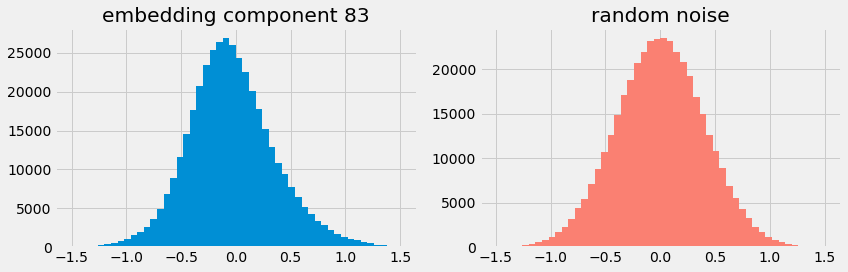

In [11]:
j = 83
x = [embedding[w][j] for w in vocab]

sigma = np.std(x)
z = [np.random.normal(scale=sigma) for w in vocab]

plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.title('embedding component %d' % j)
_ = plt.hist(x, bins=50, range=(-1.5,1.5))
plt.subplot(1,2,2)
_ = plt.hist(z, bins=50, range=(-1.5,1.5), color='salmon')
plt.title('random noise')
plt.tight_layout()
plt.show()



Now, let's generate a scatter plot of a few <i>pairs</i> of components. It all looks like random Gaussian noise!


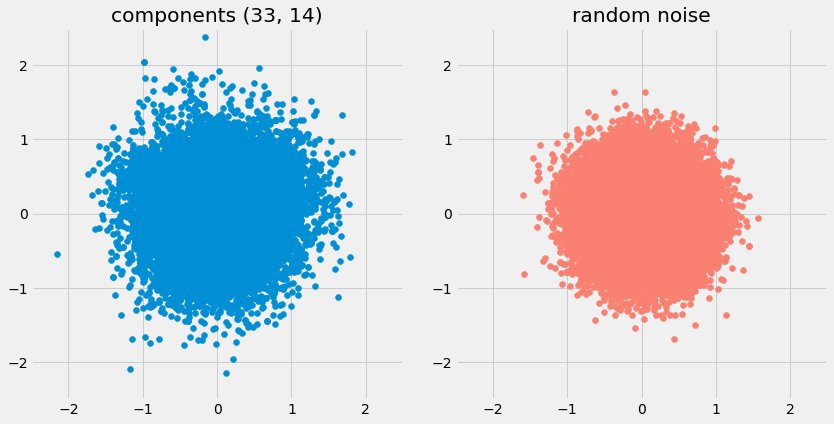

In [12]:
(i,j) = (33, 14)
x = np.array([[embedding[w][i], embedding[w][j]] for w in vocab])

(s1, s2) = (np.std(x[:,0]), np.std(x[:,1]))
z = np.array([[np.random.normal(scale=s1), np.random.normal(scale=s2)] for w in vocab])

sample = np.random.choice(range(len(vocab)), size=50000)

plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.scatter(x[sample,0], x[sample,1])
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.gca().set_aspect('equal')
plt.title('components (%d, %d)' % (i,j))


plt.subplot(1,2,2)
plt.scatter(z[sample,0], z[sample,1], color='salmon')
plt.xlim(-2.5,2.5)
plt.ylim(-2.5,2.5)
plt.gca().set_aspect('equal')
plt.title('random noise')
plt.tight_layout()
plt.show()


### Exploring analogies

Now we'll explore how analogies are "solved" using the embeddings. Here is the canonical example:


In [13]:
embedding.most_similar(positive=['king', 'woman'], negative=['man'], topn=3)

[('queen', 0.7698540687561035),
 ('monarch', 0.6843381524085999),
 ('throne', 0.6755736470222473)]

In [14]:
embedding.most_similar(positive=['paris', 'spain'], negative=['france'], topn=3)

[('madrid', 0.8061116933822632),
 ('aires', 0.7141225934028625),
 ('buenos', 0.6974526643753052)]

In [15]:
embedding.most_similar(positive=['paris', 'germany'], negative=['france'], topn=3)

[('berlin', 0.8846380710601807),
 ('frankfurt', 0.7985544204711914),
 ('vienna', 0.76759934425354)]

In [16]:
embedding.most_similar(positive=['cold', 'warm'], negative=['hot'], topn=3)

[('chilly', 0.7236389517784119),
 ('warmer', 0.63580721616745),
 ('dry', 0.6271452307701111)]

So, we see that there is a great deal of semantic information encoded in the embeddings, even though they appear to be Gaussian noise. The relations are hidden in the embedding vectors. These semantic relations are teased out and exploited by the "Attention" mechanism of Transformer language models.